In [4]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import auc, roc_curve, roc_auc_score,  classification_report, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix
from helper_functions import *

In [5]:
X = pd.read_csv('../data/final.csv')
y = X.pop('Target')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

/Users/chelseazaloumis/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


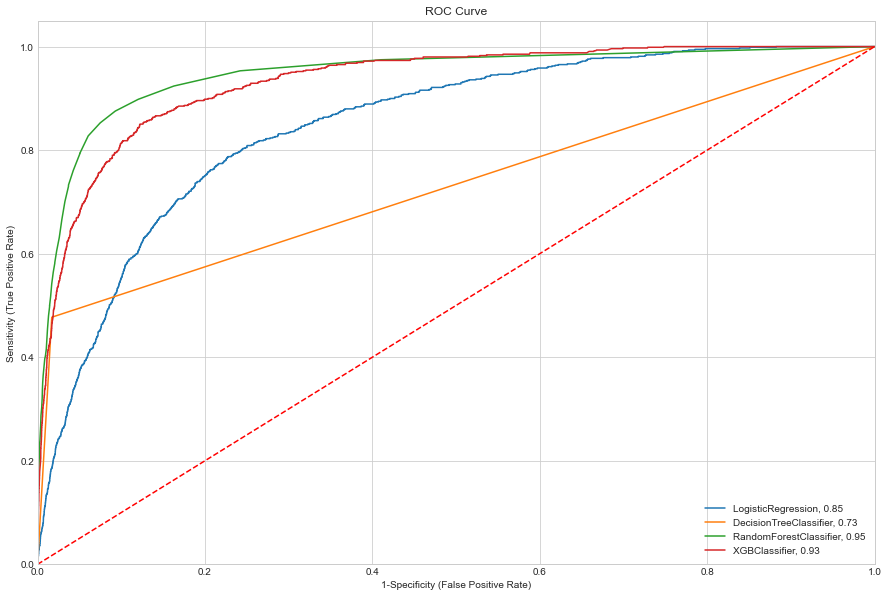

In [7]:
classification_models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(class_weight='balanced'), XGBClassifier()]
model_comparison(classification_models, X_train, y_train, X_test, y_test)

Accuracy is not a valid evaluation metric because of the class imbalance.

Which is worse: **FP** or **FN**?

*Reason shows a **FN** (like ignoring a fire alarm) is MUCH WORSE.*

$$Recall = \frac{TP}{TP + FN}$$

Therefore **Recall** is the best metric to evaluate the models by. Therefore out-of-box Random Forest outperforms XGB.

In [8]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Out of box RF:')
print(classification_report(y_test, y_pred))

Out of box RF:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     28524
         1.0       0.79      0.16      0.27       748

    accuracy                           0.98     29272
   macro avg       0.88      0.58      0.63     29272
weighted avg       0.97      0.98      0.97     29272



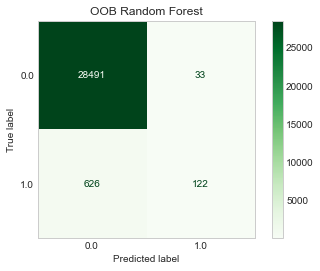

In [21]:
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Greens)
plt.title('OOB Random Forest')
plt.grid(False);

In [9]:
xgb = XGBClassifier(class_weight='balanced')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('Out of box RF:')
print(classification_report(y_test, y_pred))

[16:21:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Out of box RF:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     28524
         1.0       0.69      0.14      0.23       748

    accuracy                           0.98     29272
   macro avg       0.83      0.57      0.61     29272
weighted avg       0.97      0.98      0.97     29272



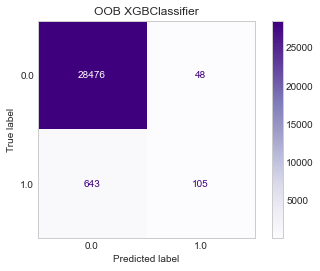

In [20]:
plot_confusion_matrix(xgb, X_test, y_test, cmap=plt.cm.Purples)
plt.title('OOB XGBClassifier')
plt.grid(False);